In [1]:
%matplotlib inline

# Assignment 4

**DUE: Tuesday, March 4th 2022 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. To do so, restart the kernel and run all cells (in the menubar, select Runtime→→Restart and run all).
#### Show your work!
Whenever you are asked to find the solution to a problem, be sure to also **show how you arrived** at your answer.

In [2]:
%matplotlib inline

In [3]:
NAME = "Alex Salman"
STUDENT_ID = "1851405"

## Problem 1 - Bayes' Theorem - Testing for a Genetic Defect
---
Testing for a genetic defect is not perfect. There are two kinds of errors in a binary test, a **false positive** where a test result incorrectly indicates a presence of a condition when it is not present, and a **false negative** where the test incorrectly fails to indicate the presence of a condition when it is present. These are in contrast with the two correct results; **true positive** and **true negative**.

Given the following data, answer the following questions
* Two percent of people have this genetic defect.
* Ninety two percent of tests for the gene detect it (true positive)
* Six percent of tests are false positives. 

### Part 1
What is the probability of getting a positive result on the test?

###### The probability of tests true positives:
###### P(gene | detected) = 1 - P(~gene | detected) = 1 - 0.06 = 0.94 (94%)
###### Using Bayes' Theorem P(A|B) = P(B|A) . P(A) / P(B) to find the probability of getting a positive result on the test
###### P(detected) = P(detected | gene) . P(gene) / P(gene | detected) = 0.92 . 0.02 / 0.94 = 0.0195 (1.95%)

### Part 2
What is the probability of having the gene, given a positive result?

###### P(gene | detected = positive) = 0.0195 * 0.92 = 0.0179 (1.79%) 


## Problem 2 - Bayesian Networks
---
You are given the following Bayyesian network consisting of five binary random variables S1, S2, S3, S4, S5. Each variable can represent a certain state which can be "True" or "False". Answer the following questions based on the probabilities given below.

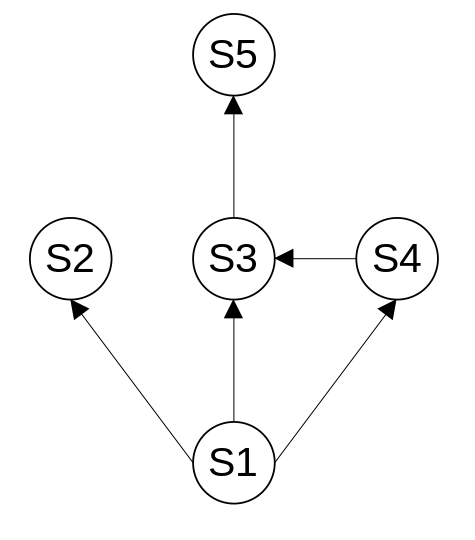

* P(S1 = true) = 0.5
* P(S2 = true | S1) = {0.6, S1 = false; 0.75, S1 = true}
* P(S4 = true | S1) = {0.1, S1 = false; 0.8, S1 = true}
* P(S3 = true | S1,S4) = {0.2, S1=false,S4=false; 0.8, S1=true,S4=false; 0.4, S1=false,S4=true; 0.9, S1=true,S4=true}
* P(S5 = true | S3) = { 0.75, S3 = false; 0.1 S3 = true}


### Part 1 
Given the above network and probabilities, calculate the probability of P(S1=true, S2=true, S3=true, S4=true, S5=true).



######P(S1=true, S2=true, S3=true, S4=true, S5=true) = 
######P(S1=true) * P(S2 = true | S1 = true) * P(S3 = true | S1 = true, S4 = true) * P(S4 = true | S1 = true) * P(S5 = true | S3 - true) = 
######0.5 * 0.75 * 0.9 * 0.8 * 0.1 = 0.027 (0.27%)

### Part 2
Given the above network and probabilities, calculate the probability of P(S5 = true | S1 = true).


######P(S5 = true | S1 = true) =
######P(S1 = true) * P(S4 = true | S1 = true) * [ P(S3 = true | S1 = true, S4 = true) + P(S3 = true | S1 = true, S4 = false) ] * [ P(S5 = true | S3 = true) + P(S5 = true | S3 = false) ] =
######0.5 * 0.8 * [0.9 + 0.8] * [0.1 + 0.75] =
######0.5 * 0.8 * 1.7 * 0.85 = 
######0.578 (57.8%)


### Part 3
Given the above network and probabilities, calculate the probability of P(S1 = true | S5 = true).

###### P(S1 = true | S5 = true) = P(S1 = true) = 0.5 (50%)

### Part 4
Using the chain rule of probability factor P(S1, S2, S3, S4, S5) give the minimum number of parameters to specify the distribution according to the independencies mentioned:

(i) S1, S2, S3, S4, S5 are mutually independent.

(ii) no independencies. 

###### (i) Number of parameters = number of states = 5
###### (ii) Number of parameters = 2 ^ number of states = 2 ^ 5 = 32

## Problem 3 - COVID-19 Simulation
---

Using MDP, model the spread of COVID-19 for creating a simulator, under certain assumptions in a hypothetical situation. In the simulation, the inhabitants of a town move around as they go about their regular business.

In the simulation, there are 2 types of people in the town, a **carrier** or **non-carrier** of the Coronavirus. The virus spreads via droplets when an infected person comes in close contact (within 6 feets) of another person who has the virus, a carrier. Non-carriers cannot transmit the disease. Associated with these two types are 5 different states that a person can be in. A carrier can be in one of the following 2 states: infected (but not sick i.e. asymptomatic), or sick. A non-carrier can be in 3 states: unexposed, dead, or immune.

The states (with a distinct color representing the state in the MDP) are described as the following:


*   **Unexposed** (BLUE): The people who haven't encountered the virus at all so far.
*   **Infected** (ORANGE): People who have the virus but have no symptoms of the disease. An unexposed person has an 80% chance of getting infected on coming in contact with a person carrying the virus. An infected person may get sick with symptoms in 5 days or stay infected (contagious) for 15 days and develop immunity after that.
*   **Sick** (RED): Symptomatic people who have the virus and are sick. Of those infected individuals, 50% get sick with the disease. In 10 days, a sick person may recover completely (98%) and develop lifelong immunity, or may die (2%).
*   **Dead** (GRAY): People who die from the disease. 2% of the sick die.
*   **Immune** (GREEN): There are two ways of getting to this state: 1) People who got sick with COVID-19, and recovered and thereby, have developed lifelong immunity, 2) People who were infected but didn't develop symptoms and became immune once they stopped being contagious.


Let's assume that, the cost for running 1 day of simulation is 1 standard processing cycle of a specific computer. On day 1 of the simulation, a (random) person returned to the town from elsewhere and is sick with the virus. Unexposed people who come in contact with this carrier as they travel between home and work may become infected with the virus. There is an 80% chance of contracting the virus (and changing state to infected) on contact with a carrier. We assume that this is the only means by which an unexposed person may get infected by the virus, and they are infected immediately. To summarize, the following transitions between states are possible:

*   Unexposed → Infected (happens immediately on the same day after each contact with 80% chance)
*   Infected → Sick (after 5 days of getting infected with 50% chance)
*   Infected → Immune (after 15 days of getting infected with 50% chance)
*   Sick → Immune (after 10 days of getting sick with 98% chance)
*   Sick → Dead (after 10 days of getting sick with 2% chance)

### Part 1
Draw the MDP graphically.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vS7NglpYtdd1kmWWSOSBL8u7ZRvoDyh46r87cKC6VcmLbIkZyY7iA8w_7BUY_x7vM1SJ-qwy6RcwYQx/pub?w=960&amp;h=720">

### Part 2
Create the transition probabilities matrix/table for the MDP.

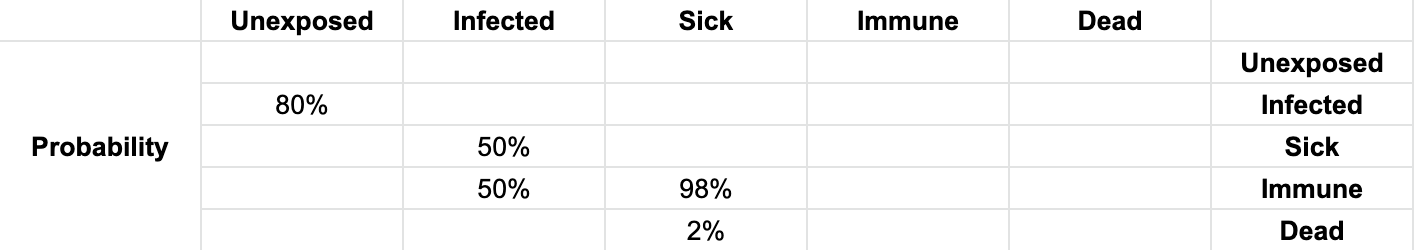

## Problem 4: MDP of a Professional Lifestyle 
---
Solve the following  MDP using both ***Value Iteration*** and ***Policy Iteration*** algorithms.

Neo is a freelance computer programmer, and his aim in life is to earn as much money as he can by writing more code. He has three possible states in his daily professional life as below.

1.   **Productive** - He can write programming codes more efficiently.
2.   **Exhausted** - He is too tired to think well in order to write efficient programming codes.
3.   **Fit** - He is physically and mentally in a great state to write code and solve programming problems.


When Neo is **Exhausted**, he can choose one of three actions: (1) Keep **Coding**, (2) do some physical **Exercise**, or (3) get some **Rest**.

If he chooses to do more coding, he remains in the **Exhausted** state with the certainty of getting a \$20 reward. If he decides to get Rest, he has 80% chance of moving to the next state, **Productive**, and a 20% chance of staying **Exhausted**.
If he doesn’t want to get Rest, he may go to the gym and do some physical Exercise. This gives him a 50% chance of entering the **Productive** state and a 50% chance of staying **Exhausted** state. However, he needs to pay for the gym, so this choice results in a -\$10 reward.

When Neo becomes **Productive**, he can write programs more efficiently. From there, he has an 80% chance of getting **Exhausted** again with earning a \$40 reward, and a 20% chance of staying **Productive** while earning a \$30 reward.
Sometimes, when he is **Productive**, he wants to do some physical Exercise. When he Exercises in this state, he enjoys it very much and gets 100% **Fit** physically and mentally. However, he needs to pay \$10 for it.

Once Neo reaches the state **Fit**, he is fully-committed to earning more money by more Coding. Because he is in such a great state physically and mentally, he can write programs very efficiently. In this state, he earns a \$100 reward, and he keeps writing code until he is **Exhausted** again.

Use MDP to find the best policy to maximize his earnings/rewards over time.

### Part 1
Draw the MDP graphically.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTzv2FwKfHfBIktWiw5j5r2yPL8d39bTS-pwh5ZxlxndS09clGSrlyvqdDiDN3YN2t8fQO4EWIPci3m/pub?w=960&amp;h=720">

### Part 2
Using a discount factor of 0.86, solve the MDP using value iteration algorithm (until the values have become reasonably stable). You should start with the values set to zero. You should show both the optimal policy and the optimal values.

$V_{k+1}(s) ← max_{a} Σ_{s'} T(s,a,s')\large[R(s,a,s') + \gamma V_{k}(s')\large]$
###### Let's start with the values of states set to zero


$V_{0}(s(Productive)) = 0$ <br>
$V_{0}(s(Exhausted)) = 0$ <br>
$V_{0}(s(Fit)) = 0$ <br><br>
$i=0$<br>

$V_{1}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 0 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 0 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 0 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[6, 32, -10] = 32$<br><br>

$V_{1}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 0 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 0 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 0 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 0 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 0 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[0, 0, -5, -5, 20] = 20$<br><br>

$V_{1}(s(Fit)) = max[1.0 ( 100 + 0.86 * 0 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[100] = 100$<br><br>

<br><br>
$V_{1}(s(Productive)) = 32$ <br>
$V_{1}(s(Exhausted)) = 20$ <br>
$V_{1}(s(Fit)) = 100$ <br><br>
$i=1$<br>

$V_{2}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 32 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 20 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 100 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[11.504, 45.76, 76] = 76$<br><br>

$V_{2}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 20 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 32 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 20 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 32 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 20 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[3.44, 22.016, 3.6, 8.76, 37.2] = 37.2$<br><br>

$V_{2}(s(Fit)) = max[1.0 ( 100 + 0.86 * 20 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[117.2] = 117.2$<br><br>

<br><br>
$V_{2}(s(Productive)) = 76$ <br>
$V_{2}(s(Exhausted)) = 37.2$ <br>
$V_{2}(s(Fit)) = 117.2$ <br><br>
$i=2$<br>

$V_{3}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 76 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 37.2 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 117.2 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[19.072, 57.5936, 90.792] = 90.792$<br><br>

$V_{3}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 37.2 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 76 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 37.2 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 76 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 37.2 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[6.3984, 52.288, 10.996, 27.68, 51.992] = 52.288$<br><br>

$V_{3}(s(Fit)) = max[1.0 ( 100 + 0.86 * 37.2 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[131.992] = 131.992$<br><br>


<br><br>
$V_{3}(s(Productive)) = 90.792$ <br>
$V_{3}(s(Exhausted)) = 52.288$ <br>
$V_{3}(s(Fit)) = 131.992$ <br><br>
$i=3$<br>

$V_{4}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 90.792 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 52.288 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 131.992 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[21.616224, 67.974144, 103.51312] = 103.51312$<br><br>

$V_{4}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 52.288 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 90.792 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 52.288 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 90.792 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 52.288 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[8.993536, 62.464896, 17.48384, 34.04056, 64.96768] = 64.96768$<br><br>

$V_{4}(s(Fit)) = max[1.0 ( 100 + 0.86 * 52.288 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[144.96768] = 144.96768$<br><br>


<br><br>
$V_{4}(s(Productive)) = 103.51312$ <br>
$V_{4}(s(Exhausted)) = 64.96768$ <br>
$V_{4}(s(Fit)) = 144.96768$ <br><br>
$i=4$<br>

$V_{5}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 103.51312 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 64.96768 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 144.96768 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[23.80425664, 76.69776384, 114.6722048] = 114.6722048$<br><br>

$V_{5}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 64.96768 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 103.51312 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 64.96768 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 103.51312 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 64.96768 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[11.17444096, 71.21702656, 22.9361024, 39.5106416, 75.8722048] = 75.8722048$<br><br>

$V_{5}(s(Fit)) = max[1.0 ( 100 + 0.86 * 64.96768 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[155.8722048] = 155.8722048$<br><br>


<br><br>
$V_{5}(s(Productive)) = 114.6722048$ <br>
$V_{5}(s(Exhausted)) = 75.8722048$ <br>
$V_{5}(s(Fit)) = 155.8722048$ <br><br>
$i=5$<br>

$V_{6}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 114.6722048 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 75.8722048 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 155.8722048 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[25.72361923, 84.2000769, 124.0500961] = 124.0500961$<br><br>

$V_{6}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 75.8722048 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 114.6722048 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 75.8722048 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 114.6722048 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 75.8722048 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[13.05001923, 78.8944769, 27.62504806, 44.30904806, 85.25009613] = 85.25009613$<br><br>

$V_{6}(s(Fit)) = max[1.0 ( 100 + 0.86 * 75.8722048 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[165.2500961] = 165.2500961$<br><br>


<br><br>
$V_{6}(s(Productive)) = 124.0500961$ <br>
$V_{6}(s(Exhausted)) = 85.25009613$ <br>
$V_{6}(s(Fit)) = 165.2500961$ <br><br>
$i=6$<br>

$V_{7}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 124.0500961 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 85.25009613 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 165.2500961 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[27.33661653, 90.65206614, 132.1150826] = 132.1150826$<br><br>

$V_{7}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 85.25009613 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 124.0500961 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 85.25009613 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 124.0500961 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 85.25009613 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[14.66301653, 85.34646612, 31.65754134, 48.34154132, 93.31508267] = 93.31508267$<br><br>

$V_{7}(s(Fit)) = max[1.0 ( 100 + 0.86 * 85.25009613 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[173.3150827] = 173.3150827$<br><br>


<br><br>
$V_{7}(s(Productive)) = 132.1150826$ <br>
$V_{7}(s(Exhausted)) = 93.31508267$ <br>
$V_{7}(s(Fit)) = 173.3150827$ <br><br>
$i=7$<br>

$V_{8}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 132.1150826 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 93.31508267 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 173.3150827 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[28.72379421, 96.20077688, 139.0509711] = 139.0509711$<br><br>

$V_{8}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 93.31508267 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 132.1150826 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 93.31508267 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 132.1150826 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 93.31508267 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[16.05019422, 90.89517683, 35.12548555, 51.80948552, 100.2509711] = 100.2509711$<br><br>

$V_{8}(s(Fit)) = max[1.0 ( 100 + 0.86 * 93.31508267 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[180.2509711] = 180.2509711$<br><br>


<br><br>
$V_{8}(s(Productive)) = 139.0509711$ <br>
$V_{8}(s(Exhausted)) = 100.2509711$ <br>
$V_{8}(s(Fit)) = 180.2509711$ <br><br>
$i=8$<br>

$V_{9}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 139.0509711 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 100.2509711 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 180.2509711 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[29.91676703, 100.9726681, 145.0158351] = 145.0158351$<br><br>

$V_{9}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 100.2509711 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 139.0509711 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 100.2509711 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 139.0509711 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 100.2509711 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[17.24316703, 95.66706812, 38.10791757, 54.79191757, 106.2158351] = 106.2158351$<br><br>

$V_{9}(s(Fit)) = max[1.0 ( 100 + 0.86 * 100.2509711 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[186.2158351] = 186.2158351$<br><br>


<br><br>
$V_{9}(s(Productive)) = 145.0158351$ <br>
$V_{9}(s(Exhausted)) = 106.2158351$ <br>
$V_{9}(s(Fit)) = 186.2158351$ <br><br>
$i=9$<br>

$V_{10}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 145.0158351 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 106.2158351 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 186.2158351 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[30.94272364, 105.0764945, 150.1456182] = 150.1456182$<br><br>

$V_{10}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 106.2158351 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 145.0158351 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 106.2158351 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 145.0158351 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 106.2158351 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[18.26912364, 99.77089455, 40.67280909, 57.35680909, 111.3456182] = 111.3456182$<br><br>

$V_{10}(s(Fit)) = max[1.0 ( 100 + 0.86 * 106.2158351 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[191.3456182] = 191.3456182$<br><br>


<br><br>
$V_{10}(s(Productive)) = 150.1456182$ <br>
$V_{10}(s(Exhausted)) = 111.3456182$ <br>
$V_{10}(s(Fit)) = 191.3456182$ <br><br>
$i=10$<br>

$V_{11}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 150.1456182 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 111.3456182 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 191.3456182 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[31.82504633, 108.6057853, 154.5572317] = 154.5572317$<br><br>

$V_{11}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 111.3456182 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 150.1456182 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 111.3456182 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 150.1456182 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 111.3456182 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[19.15144633, 103.3001853, 42.87861583, 57.35680909, 115.7572317] = 115.7572317$<br><br>

$V_{11}(s(Fit)) = max[1.0 ( 100 + 0.86 * 111.3456182 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[195.7572317] = 195.7572317$<br><br>


<br><br>
$V_{11}(s(Productive)) = 154.5572317$ <br>
$V_{11}(s(Exhausted)) = 115.7572317$ <br>
$V_{11}(s(Fit)) = 195.7572317$ <br><br>
$i=11$<br>

$V_{12}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 154.5572317 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 115.7572317 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 195.7572317 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[32.58384385, 111.6409754, 158.3512193] = 158.3512193$<br><br>

$V_{12}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 115.7572317 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 154.5572317 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 115.7572317 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 154.5572317 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 115.7572317 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[19.91024385, 106.3353754, 44.77560963, 61.45960963, 119.5512193] = 119.5512193$<br><br>

$V_{12}(s(Fit)) = max[1.0 ( 100 + 0.86 * 115.7572317 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[199.5512193] = 199.5512193$<br><br>


<br><br>
$V_{12}(s(Productive)) = 158.3512193$ <br>
$V_{12}(s(Exhausted)) = 119.5512193$ <br>
$V_{12}(s(Fit)) = 199.5512193$ <br><br>
$i=12$<br>

$V_{13}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 158.3512193 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 119.5512193 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 199.5512193 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[33.23640972, 114.2512389, 161.6140486] = 161.6140486$<br><br>

$V_{13}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 119.5512193 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 158.3512193 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 119.5512193 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 158.3512193 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 119.5512193 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[20.56280972, 108.9456389, 46.4070243, 63.0910243, 122.8140486] = 122.8140486$<br><br>

$V_{13}(s(Fit)) = max[1.0 ( 100 + 0.86 * 119.5512193 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[202.8140486] = 202.8140486$<br><br>


<br><br>
$V_{13}(s(Productive)) = 161.6140486$ <br>
$V_{13}(s(Exhausted)) = 122.8140486$ <br>
$V_{13}(s(Fit)) = 202.8140486$ <br><br>
$i=13$<br>

$V_{14}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 161.6140486 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 122.8140486 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 202.8140486 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[33.79761636, 116.4960654, 164.4200818] = 164.4200818$<br><br>

$V_{14}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 122.8140486 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 161.6140486 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 122.8140486 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 161.6140486 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 122.8140486 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[21.12401636, 111.1904654, 47.8100409, 64.4940409, 125.6200818] = 125.6200818$<br><br>

$V_{14}(s(Fit)) = max[1.0 ( 100 + 0.86 * 122.8140486 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[205.6200818] = 205.6200818$<br><br>


<br><br>
$V_{14}(s(Productive)) = 164.4200818$ <br>
$V_{14}(s(Exhausted)) = 125.6200818$ <br>
$V_{14}(s(Fit)) = 205.6200818$ <br><br>
$i=14$<br>

$V_{15}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 164.4200818 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 125.6200818 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 205.6200818 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[34.28025407, 118.4266163, 166.8332703] = 166.8332703$<br><br>

$V_{15}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 125.6200818 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 164.4200818 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 125.6200818 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 164.4200818 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 125.6200818 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[21.60665407, 113.1210163, 49.01663517, 65.70063517, 128.0332703] = 128.0332703$<br><br>

$V_{15}(s(Fit)) = max[1.0 ( 100 + 0.86 * 125.6200818 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[208.0332703] = 208.0332703$<br><br>


<br><br>
$V_{15}(s(Productive)) = 166.8332703$ <br>
$V_{15}(s(Exhausted)) = 128.0332703$ <br>
$V_{15}(s(Fit)) = 208.0332703$ <br><br>
$i=15$<br>

$V_{16}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 166.8332703 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 128.0332703 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 208.0332703 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[34.69532249, 120.08689, 168.9086125] = 168.9086125$<br><br>

$V_{16}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 128.0332703 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 166.8332703 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 128.0332703 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 166.8332703 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 128.0332703 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[22.02172249, 114.78129, 50.05430623, 66.73830623, 130.1086125] = 130.1086125$<br><br>

$V_{16}(s(Fit)) = max[1.0 ( 100 + 0.86 * 128.0332703 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[210.1086125] = 210.1086125$<br><br>


<br><br>
$V_{16}(s(Productive)) = 168.9086125$ <br>
$V_{16}(s(Exhausted)) = 130.1086125$ <br>
$V_{16}(s(Fit)) = 210.1086125$ <br><br>
$i=16$<br>

$V_{17}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 168.9086125 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 130.1086125 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 210.1086125 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[35.05228135, 121.5147254, 170.6934068] = 170.6934068$<br><br>

$V_{17}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 130.1086125 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 168.9086125 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 130.1086125 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 168.9086125 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 130.1086125 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[22.37868135, 116.2091254, 50.94670338, 67.63070338, 131.8934068] = 131.8934068$<br><br>

$V_{17}(s(Fit)) = max[1.0 ( 100 + 0.86 * 130.1086125 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[211.8934068] = 211.8934068$<br><br>


<br><br>
$V_{17}(s(Productive)) = 170.6934068$ <br>
$V_{17}(s(Exhausted)) = 131.8934068$ <br>
$V_{17}(s(Fit)) = 211.8934068$ <br><br>
$i=17$<br>

$V_{18}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 170.6934068 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 131.8934068 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 211.8934068 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[35.35926597, 122.7426639, 172.2283298] = 172.2283298$<br><br>

$V_{18}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 131.8934068 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 170.6934068 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 131.8934068 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 170.6934068 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 131.8934068 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[22.68566597, 117.4370639, 51.71416492, 68.39816492, 133.4283298] = $<br><br>

$V_{18}(s(Fit)) = max[1.0 ( 100 + 0.86 * 131.8934068 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[213.4283298] = 213.4283298$<br><br>


<br><br>
$V_{18}(s(Productive)) = 172.2283298$ <br>
$V_{18}(s(Exhausted)) = 133.4283298$ <br>
$V_{18}(s(Fit)) = 213.4283298$ <br><br>
$i=18$<br>

$V_{19}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 172.2283298 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 133.4283298 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 213.4283298 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[35.62327273, 123.7986909, 173.5483636] = 173.5483636$<br><br>

$V_{19}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 133.4283298 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 172.2283298 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 133.4283298 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 172.2283298 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 133.4283298 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[22.94967273, 118.4930909, 52.37418181, 69.05818181, 134.7483636] = 134.7483636$<br><br>

$V_{19}(s(Fit)) = max[1.0 ( 100 + 0.86 * 133.4283298 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[214.7483636] = $<br>214.7483636<br>


<br><br>
$V_{19}(s(Productive)) = 173.5483636$ <br>
$V_{19}(s(Exhausted)) = 134.7483636$ <br>
$V_{19}(s(Fit)) = 214.7483636$ <br><br>
$i=19$<br>

$V_{20}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 173.5483636 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 134.7483636 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 214.7483636 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[35.85031854, 124.7068742, 174.6835927] = 174.6835927$<br><br>

$V_{20}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 134.7483636 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 173.5483636 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 134.7483636 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 173.5483636 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 134.7483636 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[23.17671854, 119.4012742, 52.94179635, 69.62579635, 135.8835927] = 135.8835927$<br><br>

$V_{20}(s(Fit)) = max[1.0 ( 100 + 0.86 * 134.7483636 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[215.8835927] = 215.8835927$<br><br>


<br><br>
$V_{20}(s(Productive)) = 174.6835927$ <br>
$V_{20}(s(Exhausted)) = 135.8835927$ <br>
$V_{20}(s(Fit)) = 215.8835927$ <br><br>
$i=20$<br>

$V_{21}(s(Productive)) = max[ 0.2 ( 30 + 0.86 * 174.6835927 ) $ (Staying in Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 40 + 0.86 * 135.8835927 ) $ (Going to Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( -10 + 0.86 * 215.8835927 ) $ (Going to Fit)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[36.04557794, 125.4879118, 175.6598897] = 175.6598897$<br><br>

$V_{21}(s(Exhausted)) = max[ 0.2 ( 0 + 0.86 * 135.8835927 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.8 ( 0 + 0.86 * 174.6835927 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 135.8835927 ) $ (Staying in Exhausted)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$0.5 ( -10 + 0.86 * 174.6835927 ) $ (Going to Productive)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$1.0 ( 20 + 0.86 * 135.8835927 ) $ (Staying in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[23.37197794, 120.1823118, 53.42994486, 70.11394486, 136.8598897] = 136.8598897$<br><br>

$V_{21}(s(Fit)) = max[1.0 ( 100 + 0.86 * 135.8835927 )$ (Going in Exhausted)]<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $= max[216.8598897] = 216.8598897$<br><br>

### Part 3
Using a discount factor of 0.86, solve the MDP using policy iteration algorithm (until you have complete convergence). You should start with the policy that always does **Coding**.

###### Referance: Class Section 8

1. Evaluate a given policy (eg. initialise policy arbitrarily for all states s ∊ S) by calculating value function for all states s ∊ S under the given policy

$$V_{\pi}(s) = E\large[ R(s,\pi(s), s') + \gamma V(s') \large]$$

2. Improve policy: find a better action for state $s\in S$

$$\pi_{1}(s) = {arg~max}_{a\in A} E\large[ R(s,a,s') + \gamma V(s') \large]$$

3. Repeat 1, 2 until the value function converges to the optimal value function.


###Iteration one<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 0 ) + ( 40 + 0.86 * 0 ) = 70 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 0 ) = 20$ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 0 ) = 100 $ (Coding)<br><br>
##### Step 2
$\pi_{1}(s(Productive)) = argmax [(0.2 * 30 + 0.86 * 70 ), (0.8 * 40 + 0.86 * 20 )] = 66.2 $(Coding)<br><br>

$\pi_{1}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 20 )] = 37.2 $ (Coding)<br><br>

$\pi_{1}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 100 )] = 186 $ (Coding)<br><br><br>

###Iteration two<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 70 ) + ( 40 + 0.86 * 20 ) = 147.4 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 20 ) = 37.2 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 100 ) = 186 $ (Coding)<br><br>
##### Step 2
$\pi_{2}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  147.4), (0.8 * 40 + 0.86 * 37.2 )] = 132.764 $(Coding)<br><br>

$\pi_{2}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 37.2 )] = 51.992 $ (Coding)<br><br>

$\pi_{2}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 186 )] = 259.96 $ (Coding)<br><br><br>


###Iteration three<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 147.4 ) + ( 40 + 0.86 * 37.2 ) = 228.756 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 37.2 ) = 51.992 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 186 ) = 259.96 $ (Coding)<br><br>
##### Step 2
$\pi_{3}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  228.756), (0.8 * 40 + 0.86 * 51.992 )] = 202.73016 $(Coding)<br><br>

$\pi_{3}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 51.992 )] = 64.71312 $ (Coding)<br><br>

$\pi_{3}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 259.96 )] = 323.5656 $ (Coding)<br><br><br>


###Iteration four<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 228.756 ) + ( 40 + 0.86 * 51.992 ) = 311.44328 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 51.992 ) = 64.71312 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 259.96 ) = 323.5656 $ (Coding)<br><br>
##### Step 2
$\pi_{4}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  311.44328), (0.8 * 40 + 0.86 * 64.71312 )] = 273.8412208 $(Coding)<br><br>

$\pi_{4}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 64.71312 )] = 75.6532832 $ (Coding)<br><br>

$\pi_{4}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 323.5656 )] = 378.266416 $ (Coding)<br><br><br>


###Iteration five<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 311.44328 ) + ( 40 + 0.86 * 64.71312 ) = 393.494504 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 64.71312 ) = 75.6532832 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 323.5656 ) = 378.266416 $ (Coding)<br><br>
##### Step 2
$\pi_{5}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  393.494504), (0.8 * 40 + 0.86 * 75.6532832 )] = 344.4052734 $(Coding)<br><br>

$\pi_{5}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 75.6532832 )] = 85.06182355 $ (Coding)<br><br>

$\pi_{5}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 378.266416 )] = 425.3091178 $ (Coding)<br><br><br>


###Iteration six<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 393.494504 ) + ( 40 + 0.86 * 75.6532832 ) = 473.467097 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 75.6532832 ) = 85.06182355 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 378.266416 ) = 425.3091178 $ (Coding)<br><br>
##### Step 2
$\pi_{6}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  473.467097), (0.8 * 40 + 0.86 * 85.06182355 )] = 413.1817034 $(Coding)<br><br>

$\pi_{6}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 85.06182355 )] = 93.15316825 $ (Coding)<br><br>

$\pi_{6}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 425.3091178 )] = 465.7658413 $ (Coding)<br><br><br>


###Iteration seven<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 473.467097 ) + ( 40 + 0.86 * 85.06182355 ) = 550.3348717 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 85.06182355 ) = 93.15316825 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 425.3091178 ) = 465.7658413 $ (Coding)<br><br>
##### Step 2
$\pi_{7}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  550.3348717), (0.8 * 40 + 0.86 * 93.15316825 )] = 479.2879897 $(Coding)<br><br>

$\pi_{7}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 93.15316825 )] = 100.1117247 $ (Coding)<br><br>

$\pi_{7}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 465.7658413 )] = 500.5586235 $ (Coding)<br><br><br>


###Iteration eight<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 550.3348717 ) + ( 40 + 0.86 * 93.15316825 ) = 623.3997144 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 93.15316825 ) = 100.1117247 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 465.7658413 ) = 500.5586235 $ (Coding)<br><br>
##### Step 2
$\pi_{8}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  623.3997144), (0.8 * 40 + 0.86 * 100.1117247 )] = 542.1237544 $(Coding)<br><br>

$\pi_{8}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 100.1117247 )] = 106.0960832 $ (Coding)<br><br>

$\pi_{8}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 500.5586235 )] = 530.4804162 $ (Coding)<br><br><br>


###Iteration nine<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 623.3997144 ) + ( 40 + 0.86 * 100.1117247 ) = 692.2198376 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 100.1117247 ) = 106.0960832 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 500.5586235 ) = 530.4804162 $ (Coding)<br><br>
##### Step 2
$\pi_{9}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  692.2198376), (0.8 * 40 + 0.86 * 106.0960832 )] = 601.3090603 $(Coding)<br><br>

$\pi_{9}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 106.0960832 )] = 111.2426316 $ (Coding)<br><br>

$\pi_{9}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 530.4804162 )] = 556.2131579 $ (Coding)<br><br><br>


###Iteration ten<br>
##### Step 1
$V_{\pi}(s(Productive)) = ( 30 + 0.86 * 692.2198376 ) + ( 40 + 0.86 * 106.0960832 ) = 756.5516919 $ (Coding)<br><br>

$V_{\pi}(s(Exhausted)) = (20 + 0.86 * 106.0960832 ) = 111.2426316 $ (Coding)<br><br>

$V_{\pi}(s(Fit)) = ( 100 + 0.86 * 530.4804162 ) = 556.2131579 $ (Coding)<br><br>
##### Step 2
$\pi_{10}(s(Productive)) = argmax [(0.2 * 30 + 0.86 *  756.5516919), (0.8 * 40 + 0.86 * 111.2426316 )] = 656.634455 $(Coding)<br><br>

$\pi_{10}(s(Exhausted)) = argmax [(1.0 * 20 + 0.86 * 111.2426316 )] = 115.6686632 $ (Coding)<br><br>

$\pi_{10}(s(Fit)) = argmax [(1.0 * 100 + 0.86 * 556.2131579 )] = 578.3433158 $ (Coding)<br><br><br>

## Problem 5: Markov Decision Process (MDP) Toolbox for Python
---

One useful Python module for solving these types of problems is called *MDP toolbox* (pymdptoolbox). The MDP toolbox provides classes and functions for the resolution of descrete-time Markov Decision Processes. The list of algorithms that have been implemented includes backwards induction, linear programming, policy iteration, q-learning and value iteration along with several variations. In the next cell you'll see how to load this module into a Jupyter notebook running in Colab. 

In [4]:
!pip install pymdptoolbox

A simple example code is given below. For details about the example, check the documentation for Python MDP Toolbox (pymdptoolbox) from this [link](https://pymdptoolbox.readthedocs.io/en/latest/index.html).

In [5]:
import numpy as np
import mdptoolbox
import mdptoolbox.example
np.random.seed(0) # Needed to get the output below
P, R = mdptoolbox.example.rand(2, 2)
pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi.run()
print(pi.policy)
print(pi.iter)

(1, 0)
1


### Part 1
First read the documentation for Python MDP Toolbox (pymdptoolbox) from this [link](https://pymdptoolbox.readthedocs.io/en/latest/index.html) and try to understand how it works.

Then solve the MDP from *Problem 4* using both **value iteration** and **policy iteration** algorithms from the Python MDP Toolbox.


In [6]:
# YOUR CODE HERE
key = ['productive', 'exhausted', 'fit']
P = np.array([
              [ # code
                [0.2, 0.8, 0], # productive
                [0, 1, 0], # exhausted
                [0, 1, 0] # fit
              ],
                # rest
              [
                [1, 0, 0],  # productive
                [0.8, 0.2, 0], # exhausted
                [0, 0, 1] # fit
              ],
                # exercise
              [
                [0, 0, 1], # productive
                [0.5, 0.5, 0], # exhausted
                [0, 0, 1] # fit
              ]
            ])


R = np.array([
              [ # code
                [30, 40, 0], # productive
                [0, 20, 0], # exhausted
                [0, 100, 0] # fit
              ],
                # rest
              [
                [1, 0, 0],  # productive
                [0, 1, 0], # exhausted
                [0, 0, 1] # fit
              ],
                # exercise
              [
                [0, 0, -10], # productive
                [-10, -10, 0], # exhausted
                [0, 0, 1] # fit
              ]
            ])

def map_policy(policy, key):
  return (key[policy[0]], key[policy[1]], key[policy[2]])


gamma = 0.86
vi = mdptoolbox.mdp.ValueIteration(P, R, gamma)
vi.run()
print("vi policy: {}".format(vi.policy))
print("vi policy: {}".format(map_policy(vi.policy, key)))
print("vi iter: {}".format(vi.iter))

pi = mdptoolbox.mdp.PolicyIteration(P, R, gamma)
pi.run()
print("pi policy: {}".format(pi.policy))
print("pi policy: {}".format(map_policy(pi.policy, key)))
print("pi iter: {}".format(pi.iter))

vi policy: (2, 1, 0)
vi policy: ('fit', 'exhausted', 'productive')
vi iter: 35
pi policy: (2, 1, 0)
pi policy: ('fit', 'exhausted', 'productive')
pi iter: 3
